In [127]:
import pandas as pd
import pmdarima as pm
from pmdarima.arima import auto_arima
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("paper", font_scale = 1.4)
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import math
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from matplotlib.pylab import rcParams
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#no fbprophet import 

In [128]:
df2 = pd.read_csv('df1.csv')

In [129]:
df2.head()

,Unnamed: 0,Complaint_Date,Complaint_Time,Crime,Crime_Description,Offense,Borough,Suspect_Age,Suspect_Gender,Latitude,Longitude,Patrol_Borough,Station_Name,Victim Age,Victim_Race,Victim_Gender,Complaint_Date_Time
0,0,06/09/2018,15:54:00,GRAND LARCENY,"LARCENY,GRAND FROM PERSON,PURS",FELONY,BRONX,<18,M,40.849453,-73.905998,PATROL BORO BRONX,TREMONT AVENUE,45-64,WHITE HISPANIC,F,2018-06-09 15:54:00
1,2,05/19/2018,12:25:00,FORGERY,"FORGERY,ETC.,UNCLASSIFIED-FELO",FELONY,MANHATTAN,45-64,M,40.751450,-73.976051,PATROL BORO MAN SOUTH,42 ST.-GRAND CENTRAL,25-44,WHITE,F,2018-05-19 12:25:00
2,3,11/04/2018,00:00:00,DANGEROUS WEAPONS,WEAPONS POSSESSION 3,FELONY,MANHATTAN,25-44,M,40.701489,-74.012545,PATROL BORO MAN SOUTH,SOUTH FERRY,65+,BLACK,M,2018-11-04 00:00:00
3,4,01/18/2018,12:23:00,POSSESSION OF STOLEN PROPERTY,"STOLEN PROPERTY 3,POSSESSION",MISDEMEANOR,MANHATTAN,25-44,M,40.758030,-73.981795,PATROL BORO MAN SOUTH,47-50 STS./ROCKEFELLER CTR.,25-44,WHITE,M,2018-01-18 12:23:00
4,5,12/29/2018,21:30:00,JOSTLING,JOSTLING,MISDEMEANOR,BRONX,45-64,F,40.827820,-73.925931,PATROL BORO BRONX,161 ST.-YANKEE STADIUM,25-44,BLACK HISPANIC,M,2018-12-29 21:30:00


In [130]:
print(df2.shape)

(16471, 17)


In [131]:
df2.isna().sum()

Unnamed: 0              0
Complaint_Date          0
Complaint_Time          0
Crime                  62
Crime_Description       0
Offense                 0
Borough                19
Suspect_Age             0
Suspect_Gender         17
Latitude               24
Longitude              24
Patrol_Borough          0
Station_Name            0
Victim Age              0
Victim_Race             0
Victim_Gender           0
Complaint_Date_Time     0
dtype: int64

In [132]:
# drop null values
df2 = df2.dropna(how='any',axis=0) 

In [133]:
df2.drop(columns = 'Unnamed: 0', inplace = True)

In [134]:
# check borough values
df2['Borough'].value_counts()

MANHATTAN    6477
BROOKLYN     5174
BRONX        2606
QUEENS       2092
Name: Borough, dtype: int64

In [135]:
df2.Complaint_Date.min()

'01/01/2006'

In [136]:
df2.Complaint_Date.max()

'12/31/2020'

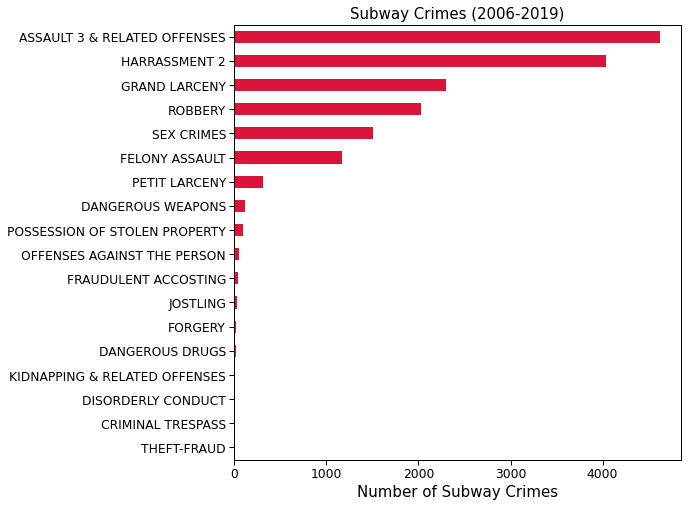

In [137]:
#plotting the crimes by # of crimes

crime_plot = plt.figure(figsize = (8, 8))
crime_plot = df2.Crime.value_counts().sort_values().plot(kind = 'barh', color = 'crimson')
plt.title("Subway Crimes (2006-2019)", fontsize = 15)
plt.xlabel("Number of Subway Crimes", fontsize = 15)
plt.xticks(np.arange(0, 5000, 1000))
plt.show()

In [138]:
#did to_datetime function to convert the string value to datetime object. 
#reassigned the df2 to make complaint_date_time a permanent datetime object 

df2['Complaint_Date_Time'] = pd.to_datetime(df2['Complaint_Date_Time'])

In [139]:
#setting index to Complaint Date Time. Use 

df2 = df2.set_index('Complaint_Date_Time')

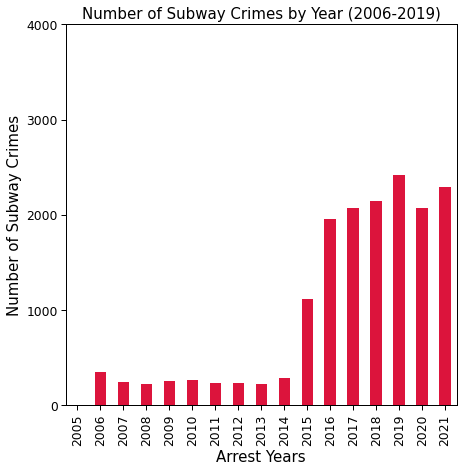

In [140]:
#crimes by year 

crimes_number_by_year = plt.figure(figsize = (7,7))
crimes_number_by_year = df2.groupby(df2.index.year).count()['Crime'].plot(kind='bar', color = 'crimson')
plt.title("Number of Subway Crimes by Year (2006-2019)", fontsize = 15)
plt.ylabel("Number of Subway Crimes", fontsize = 15)
plt.xlabel("Arrest Years", fontsize = 15)
plt.yticks(np.arange(0, 5000, 1000))
plt.show()

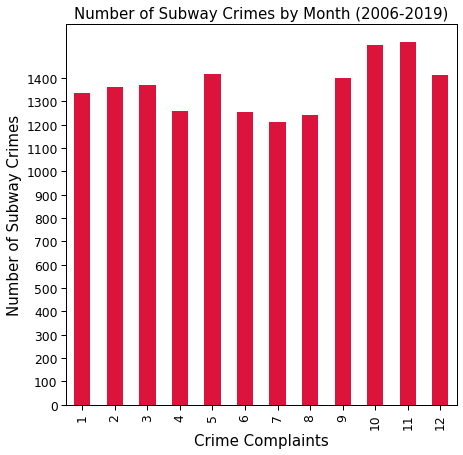

In [141]:
#crimes by month 

crimes_number_by_month = plt.figure(figsize = (7,7))
crimes_number_by_month = df2.groupby(df2.index.month).count()['Crime'].plot(kind='bar', color = 'crimson')
plt.title("Number of Subway Crimes by Month (2006-2019)", fontsize = 15)
plt.ylabel("Number of Subway Crimes", fontsize = 15)
plt.xlabel("Crime Complaints", fontsize = 15)
plt.yticks(np.arange(0, 1500, 100))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

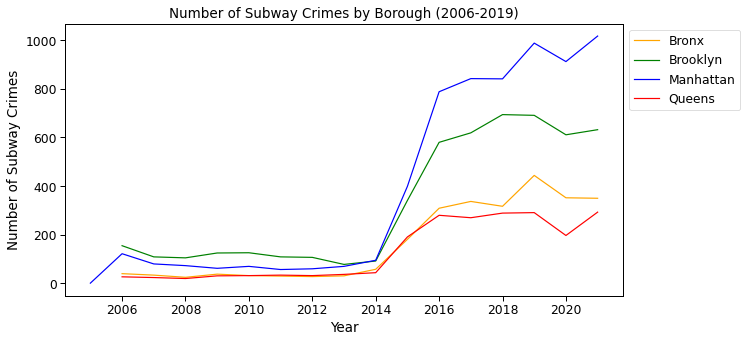

In [142]:
#crimes in borough line graph by year 

crimes_borough_year = df2.groupby(['Borough', df2.index.year]).count()['Crime']
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(crimes_borough_year.loc['BRONX'], color='orange', label='Bronx')
plt.plot(crimes_borough_year.loc['BROOKLYN'], color='green', label='Brooklyn')
plt.plot(crimes_borough_year.loc['MANHATTAN'], color='blue', label='Manhattan')
plt.plot(crimes_borough_year.loc['QUEENS'], color='red', label='Queens')
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.title('Number of Subway Crimes by Borough (2006-2019)')
plt.xlabel('Year')
plt.ylabel('Number of Subway Crimes')
plt.show

In [143]:
#making new csv to save, to put into new notebook 

df2.to_csv('df2.csv')

In [144]:
df2.head()

,Complaint_Date,Complaint_Time,Crime,Crime_Description,Offense,Borough,Suspect_Age,Suspect_Gender,Latitude,Longitude,Patrol_Borough,Station_Name,Victim Age,Victim_Race,Victim_Gender
Complaint_Date_Time,,,,,,,,,,,,,,,
2018-06-09 15:54:00,06/09/2018,15:54:00,GRAND LARCENY,"LARCENY,GRAND FROM PERSON,PURS",FELONY,BRONX,<18,M,40.849453,-73.905998,PATROL BORO BRONX,TREMONT AVENUE,45-64,WHITE HISPANIC,F
2018-05-19 12:25:00,05/19/2018,12:25:00,FORGERY,"FORGERY,ETC.,UNCLASSIFIED-FELO",FELONY,MANHATTAN,45-64,M,40.751450,-73.976051,PATROL BORO MAN SOUTH,42 ST.-GRAND CENTRAL,25-44,WHITE,F
2018-11-04 00:00:00,11/04/2018,00:00:00,DANGEROUS WEAPONS,WEAPONS POSSESSION 3,FELONY,MANHATTAN,25-44,M,40.701489,-74.012545,PATROL BORO MAN SOUTH,SOUTH FERRY,65+,BLACK,M
2018-01-18 12:23:00,01/18/2018,12:23:00,POSSESSION OF STOLEN PROPERTY,"STOLEN PROPERTY 3,POSSESSION",MISDEMEANOR,MANHATTAN,25-44,M,40.758030,-73.981795,PATROL BORO MAN SOUTH,47-50 STS./ROCKEFELLER CTR.,25-44,WHITE,M
2018-12-29 21:30:00,12/29/2018,21:30:00,JOSTLING,JOSTLING,MISDEMEANOR,BRONX,45-64,F,40.827820,-73.925931,PATROL BORO BRONX,161 ST.-YANKEE STADIUM,25-44,BLACK HISPANIC,M


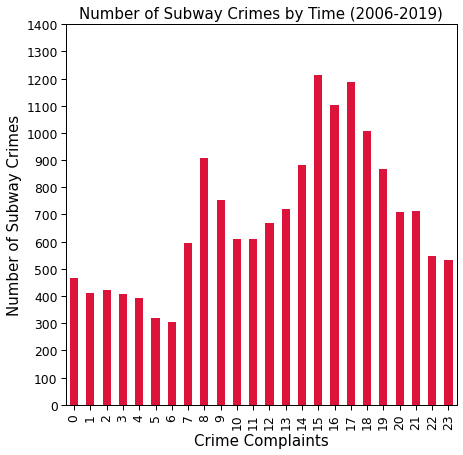

In [146]:
#crimes by hour

crimes_number_by_time = plt.figure(figsize = (7,7))
crimes_number_by_time = df2.groupby(df2.index.hour).count()['Crime'].plot(kind='bar', color = 'crimson')
plt.title("Number of Subway Crimes by Hour (2006-2019)", fontsize = 15)
plt.ylabel("Number of Subway Crimes", fontsize = 15)
plt.xlabel("Crime Complaints", fontsize = 15)
plt.yticks(np.arange(0, 1500, 100))
plt.show()